In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


df = pd.read_csv("../../data/round2.csv", delimiter= ";")
df.head(20)


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,SQUID_INK,1835,1,1834.0,22.0,NaN,NaN,1837,1,1838.0,21.0,NaN,NaN,1836.0,0.0
1,1,0,PICNIC_BASKET1,58706,1,58705.0,10.0,58704.0,27.0,58715,1,58716.0,10.0,58717.0,27.0,58710.5,0.0
2,1,0,PICNIC_BASKET2,30252,11,30251.0,27.0,NaN,NaN,30257,1,30258.0,37.0,NaN,NaN,30254.5,0.0
3,1,0,RAINFOREST_RESIN,9998,3,9996.0,1.0,9995.0,21.0,10004,1,10005.0,21.0,NaN,NaN,10001.0,0.0
4,1,0,KELP,2032,23,NaN,NaN,NaN,NaN,2035,22,NaN,NaN,NaN,NaN,2033.5,0.0
5,1,0,CROISSANTS,4274,123,NaN,NaN,NaN,NaN,4276,123,NaN,NaN,NaN,NaN,4275.0,0.0
6,1,0,JAMS,6541,255,NaN,NaN,NaN,NaN,6543,255,NaN,NaN,NaN,NaN,6542.0,0.0
7,1,0,DJEMBES,13409,62,NaN,NaN,NaN,NaN,13410,27,13411.0,35.0,NaN,NaN,13409.5,0.0
8,1,100,KELP,2032,26,NaN,NaN,NaN,NaN,2034,5,2035.0,26.0,NaN,NaN,2033.0,0.0
9,1,100,CROISSANTS,4275,48,4274.0,54.0,NaN,NaN,4276,102,NaN,NaN,NaN,NaN,4275.5,0.0


In [ ]:
products = df["product"].unique()

basket1_df = df[df["product"] == "PICNIC_BASKET1"].copy()
basket2_df = df[df["product"] == "PICNIC_BASKET2"].copy()
croissant_df = df[df["product"] == "CROISSANTS"].copy()
jam_df = df[df["product"] == "JAMS"].copy()
djembe_df = df[df["product"] == "DJEMBES"].copy()

Available products: ['SQUID_INK' 'PICNIC_BASKET1' 'PICNIC_BASKET2' 'RAINFOREST_RESIN' 'KELP'
 'CROISSANTS' 'JAMS' 'DJEMBES']


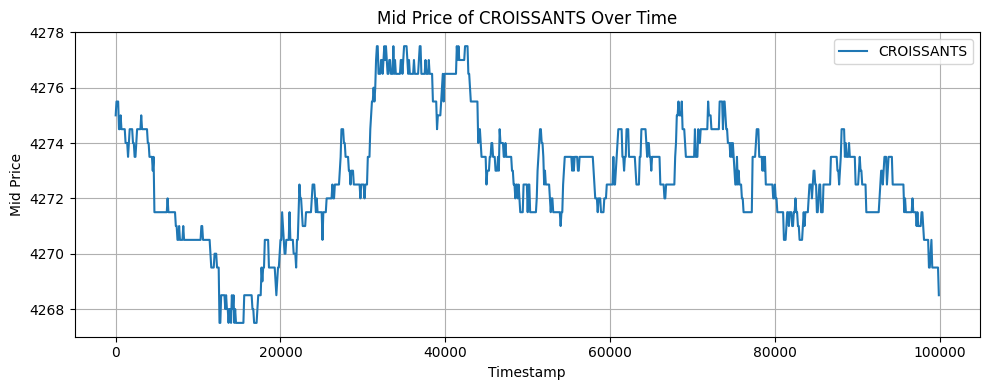

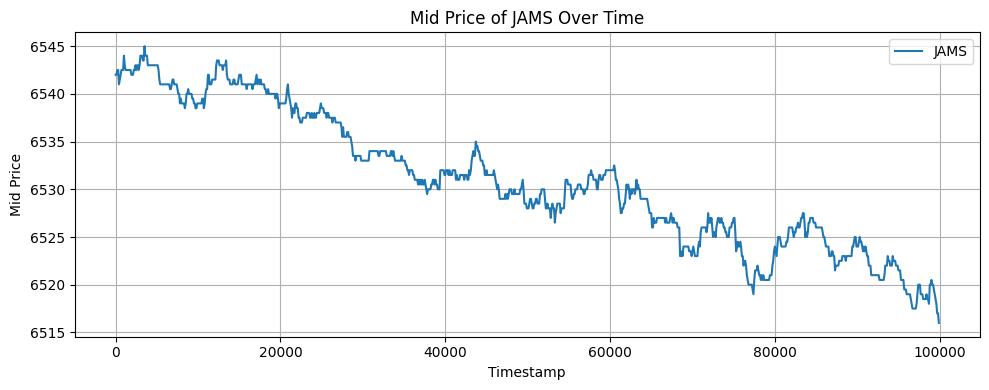

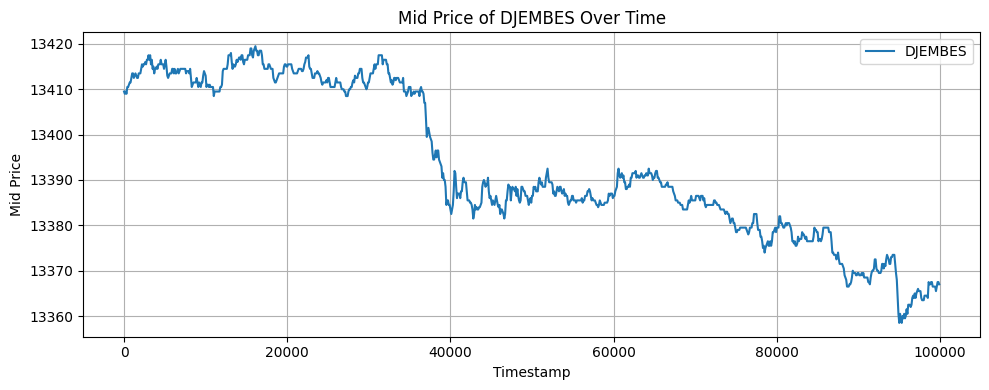

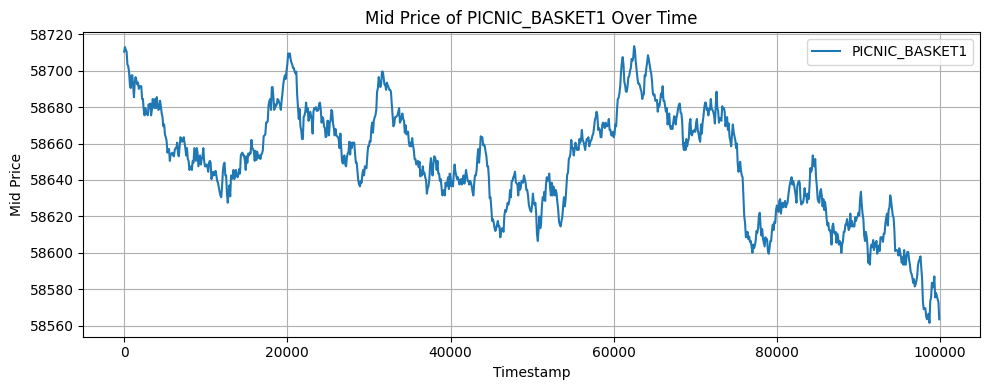

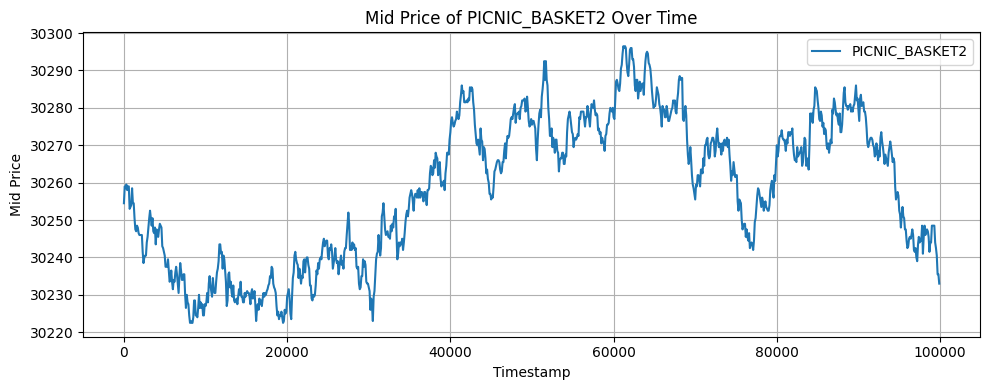

In [12]:
product_names = ["CROISSANTS", "JAMS", "DJEMBES", "PICNIC_BASKET1", "PICNIC_BASKET2"]

# Plot mid-price per product on separate graphs
for product in product_names:
    product_df = df[df["product"] == product]
    plt.figure(figsize=(10, 4))
    plt.plot(product_df["timestamp"], product_df["mid_price"], label=product)
    plt.title(f"Mid Price of {product} Over Time")
    plt.xlabel("Timestamp")
    plt.ylabel("Mid Price")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


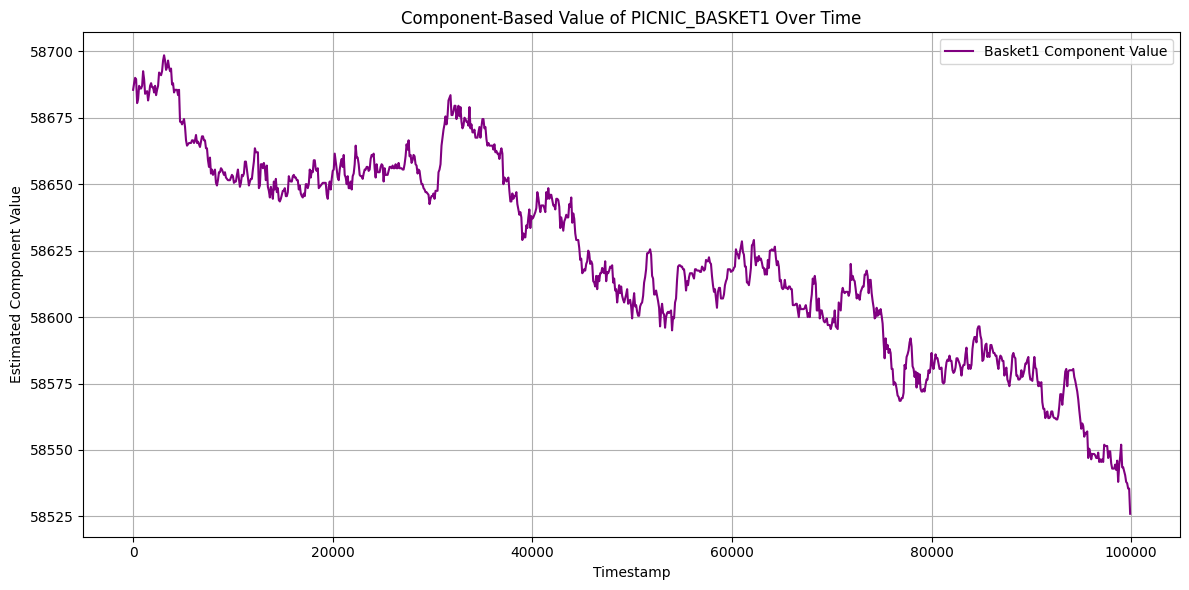

In [ ]:
croissant = df[df["product"] == "CROISSANTS"][["timestamp", "mid_price"]].rename(columns={"mid_price": "croissant"})
jam = df[df["product"] == "JAMS"][["timestamp", "mid_price"]].rename(columns={"mid_price": "jam"})
djembe = df[df["product"] == "DJEMBES"][["timestamp", "mid_price"]].rename(columns={"mid_price": "djembe"})

merged = croissant.merge(jam, on="timestamp", how="outer")
merged = merged.merge(djembe, on="timestamp", how="outer")
merged = merged.sort_values("timestamp")
merged.interpolate(method="linear", inplace=True)
merged.dropna(inplace=True)

merged["basket1_component_value"] = 6 * merged["croissant"] + 3 * merged["jam"] + merged["djembe"]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(merged["timestamp"], merged["basket1_component_value"], label="Basket1 Component Value", color="purple")
plt.title("Component-Based Value of PICNIC_BASKET1 Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Estimated Component Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


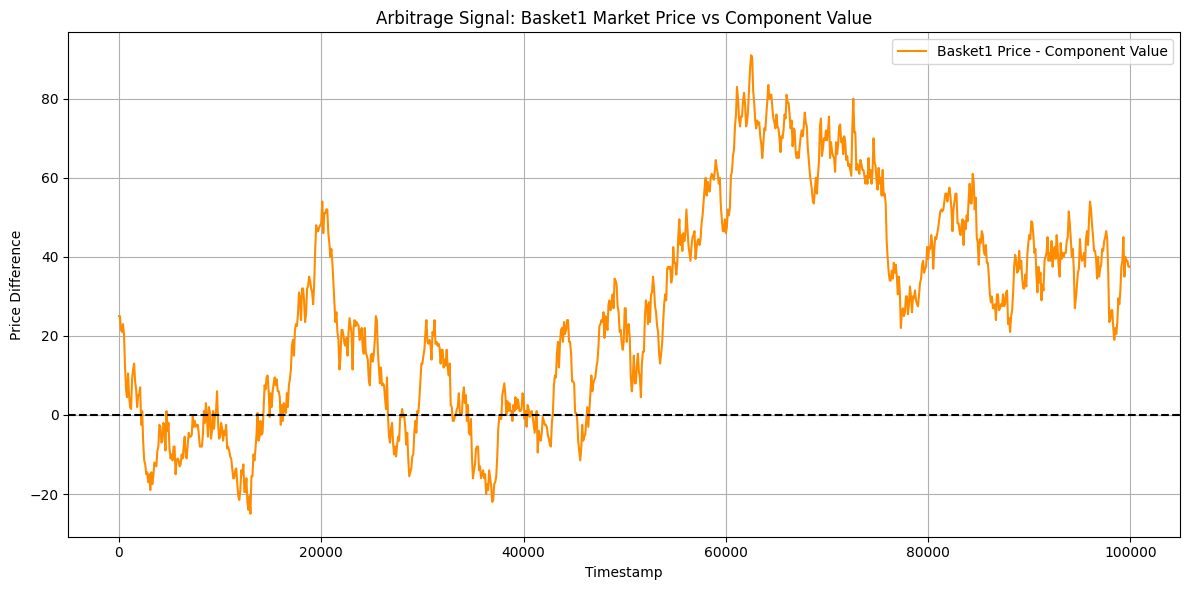

In [ ]:
basket1 = df[df["product"] == "PICNIC_BASKET1"][["timestamp", "mid_price"]].rename(columns={"mid_price": "basket1_price"})

comparison = merged.merge(basket1, on="timestamp", how="inner")

comparison["basket1_diff"] = comparison["basket1_price"] - comparison["basket1_component_value"]

plt.figure(figsize=(12, 6))
plt.plot(comparison["timestamp"], comparison["basket1_diff"], label="Basket1 Price - Component Value", color="darkorange")
plt.axhline(0, linestyle="--", color="black")
plt.title("Arbitrage Signal: Basket1 Market Price vs Component Value")
plt.xlabel("Timestamp")
plt.ylabel("Price Difference")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

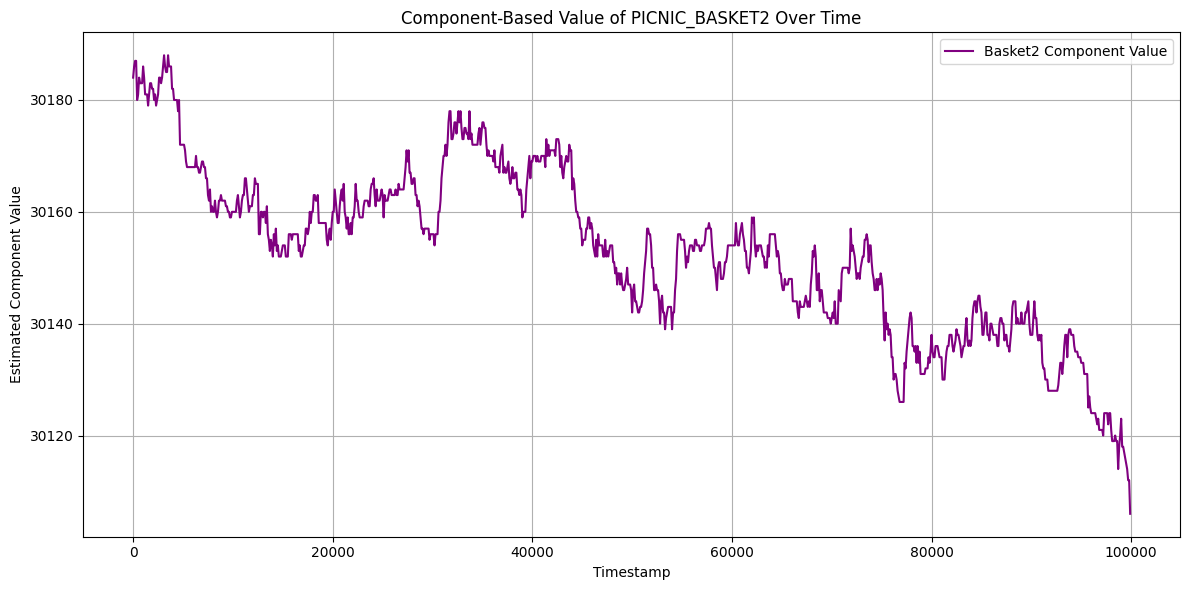

In [23]:
croissant = df[df["product"] == "CROISSANTS"][["timestamp", "mid_price"]].rename(columns={"mid_price": "croissant"})
jam = df[df["product"] == "JAMS"][["timestamp", "mid_price"]].rename(columns={"mid_price": "jam"})

merged = croissant.merge(jam, on="timestamp", how="outer")
merged = merged.sort_values("timestamp")
merged.interpolate(method="linear", inplace=True)
merged.dropna(inplace=True)

merged["basket2_component_value"] = 4 * merged["croissant"] + 2 * merged["jam"]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(merged["timestamp"], merged["basket2_component_value"], label="Basket2 Component Value", color="purple")
plt.title("Component-Based Value of PICNIC_BASKET2 Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Estimated Component Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



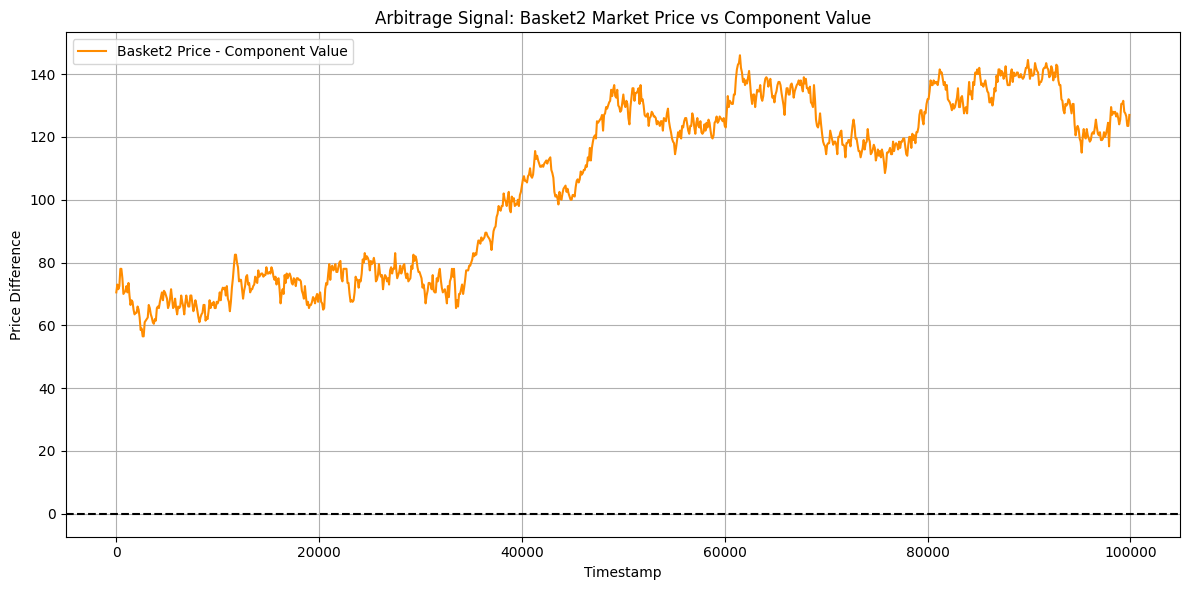

In [26]:
basket2 = df[df["product"] == "PICNIC_BASKET2"][["timestamp", "mid_price"]].rename(columns={"mid_price": "basket2_price"})

comparison = merged.merge(basket2, on="timestamp", how="inner")

comparison["basket2_diff"] = comparison["basket2_price"] - comparison["basket2_component_value"]


# Plot the difference
plt.figure(figsize=(12, 6))
plt.plot(comparison["timestamp"], comparison["basket2_diff"], label="Basket2 Price - Component Value", color="darkorange")



plt.axhline(0, linestyle="--", color="black")
plt.title("Arbitrage Signal: Basket2 Market Price vs Component Value")
plt.xlabel("Timestamp")
plt.ylabel("Price Difference")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

djembe_df = df[df["product"] == "DJEMBES"].copy()
djembe_df["timestamp"] = pd.to_numeric(djembe_df["timestamp"], errors="coerce")
djembe_df["mid_price"] = pd.to_numeric(djembe_df["mid_price"], errors="coerce")
djembe_df.dropna(subset=["mid_price"], inplace=True)

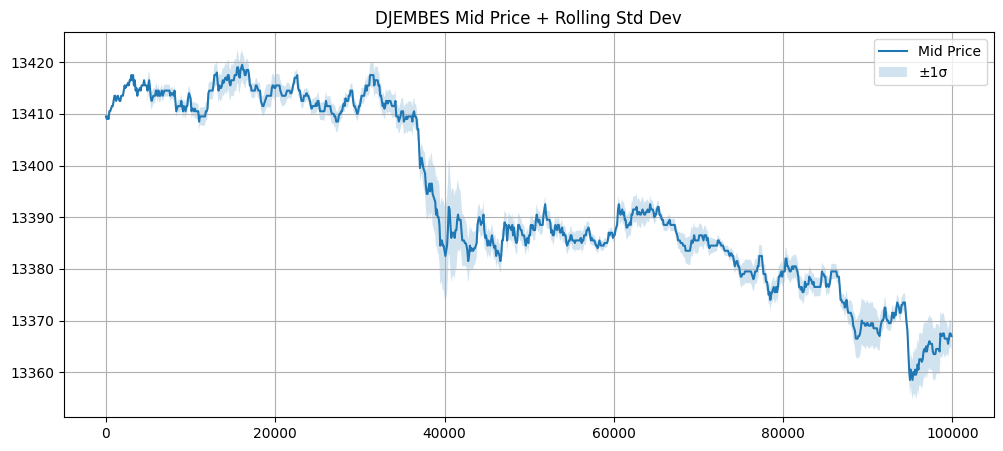

In [7]:
djembe_df["rolling_std"] = djembe_df["mid_price"].rolling(window=50).std()

plt.figure(figsize=(12, 5))
plt.plot(djembe_df["timestamp"], djembe_df["mid_price"], label="Mid Price")
plt.fill_between(djembe_df["timestamp"],
                 djembe_df["mid_price"] - djembe_df["rolling_std"],
                 djembe_df["mid_price"] + djembe_df["rolling_std"],
                 alpha=0.2, label="±1σ")
plt.title("DJEMBES Mid Price + Rolling Std Dev")
plt.legend()
plt.grid()
plt.show()

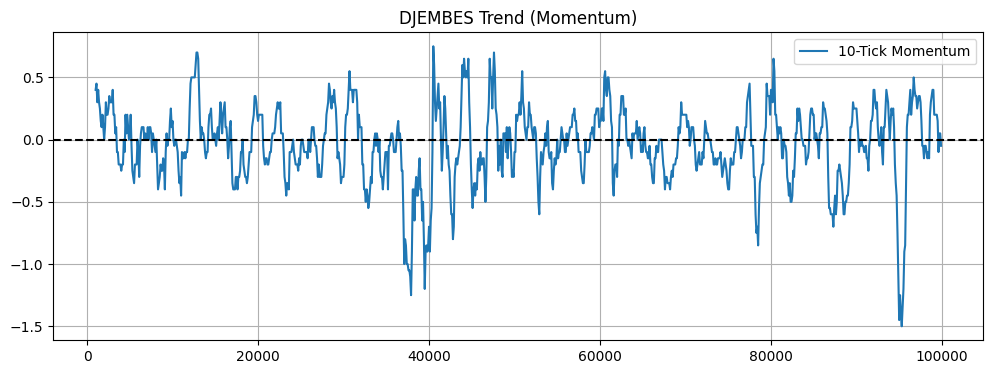

In [8]:
djembe_df["momentum"] = djembe_df["mid_price"].diff()
djembe_df["rolling_momentum"] = djembe_df["momentum"].rolling(window=10).mean()

plt.figure(figsize=(12, 4))
plt.plot(djembe_df["timestamp"], djembe_df["rolling_momentum"], label="10-Tick Momentum")
plt.axhline(0, linestyle="--", color="black")
plt.title("DJEMBES Trend (Momentum)")
plt.grid()
plt.legend()
plt.show()

In [9]:
result = adfuller(djembe_df["mid_price"].dropna())
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

ADF Statistic: -0.4926
p-value: 0.8934


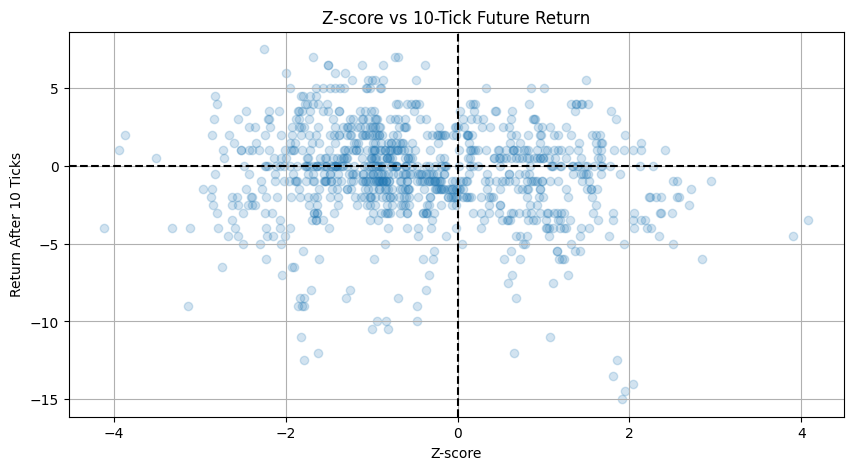

In [10]:
djembe_df["z"] = (djembe_df["mid_price"] - djembe_df["mid_price"].rolling(50).mean()) / djembe_df["mid_price"].rolling(50).std()
djembe_df["future_return_10"] = djembe_df["mid_price"].shift(-10) - djembe_df["mid_price"]

plt.figure(figsize=(10, 5))
plt.scatter(djembe_df["z"], djembe_df["future_return_10"], alpha=0.2)
plt.axhline(0, color="black", linestyle="--")
plt.axvline(0, color="black", linestyle="--")
plt.xlabel("Z-score")
plt.ylabel("Return After 10 Ticks")
plt.title("Z-score vs 10-Tick Future Return")
plt.grid()
plt.show()